# Advanced Sport Performance Analysis (Claire)

In [59]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

ModuleNotFoundError: No module named 'plotly'

In [18]:
# import the raw data from csv files
claire = pd.read_csv('claire.csv')

In [19]:
claire.head()

,Round,Home/ Away,Opponent,Result,Points,Field Goals,Penalty Goals,Goals,Tries,Conversions,...,Tackle Breaks,Total Kicks,Kicked Metres,Kick Return Metres,40/20 Kicks,Dummy Half Runs,Sin Bin,Sent Off,Penalties Conceded,Errors
0,1,H,Rabbitohs,L,10,0,0,1,2,1,...,27,16,321,0,0,2,0,0,6,6
1,2,A,Raiders,L,20,0,2,2,4,0,...,26,14,273,0,0,4,0,0,8,8
2,3,A,Cowboys,L,0,0,0,0,0,0,...,26,16,372,0,0,6,0,0,6,12
3,4,H,Sea Eagles,L,20,0,1,2,4,1,...,39,23,492,0,0,5,0,0,4,12
4,5,H,Warriors,L,28,0,2,6,4,4,...,34,14,313,0,0,4,0,0,7,12


In [20]:
claire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 31 columns):
Round                 24 non-null int64
Home/ Away            24 non-null object
Opponent              24 non-null object
Result                24 non-null object
Points                24 non-null int64
Field Goals           24 non-null int64
Penalty Goals         24 non-null int64
Goals                 24 non-null int64
Tries                 24 non-null int64
Conversions           24 non-null int64
Conversions Missed    24 non-null int64
Try Assists           24 non-null int64
Tries Conceded        24 non-null int64
Possesion %           24 non-null object
Line Breaks           24 non-null int64
Line Break Assists    24 non-null int64
Offloads              24 non-null int64
All Runs              24 non-null int64
All Runs Metres       24 non-null int64
Tackles               24 non-null int64
Missed Tackles        24 non-null int64
Tackle Breaks         24 non-null int64
Total Kicks  

In [67]:
claire.loc[claire['Result'] == 'W', 'ResultNew'] = 1
claire['ResultNew'] = claire['ResultNew'].replace(np.nan,0)

In [68]:
claire.corr()

,Round,Points,Field Goals,Penalty Goals,Goals,Tries,Conversions,Conversions Missed,Try Assists,Tries Conceded,...,Total Kicks,Kicked Metres,Kick Return Metres,40/20 Kicks,Dummy Half Runs,Sin Bin,Sent Off,Penalties Conceded,Errors,ResultNew
Round,1.000000,0.178985,-0.199806,-0.121025,0.203174,0.158995,0.277973,-0.207573,0.173369,-0.117404,...,0.213760,0.304094,NaN,NaN,0.188255,0.059721,NaN,0.113957,0.217508,0.188533
Points,0.178985,1.000000,-0.029559,0.344512,0.925512,0.976690,0.902421,0.097142,0.944031,-0.581086,...,0.404259,0.171142,NaN,NaN,0.205736,0.045184,NaN,-0.328826,0.108169,0.675800
Field Goals,-0.199806,-0.029559,1.000000,-0.160007,-0.084331,-0.025444,-0.029993,0.008520,0.020158,-0.203064,...,0.340245,0.232298,NaN,NaN,0.066060,-0.062869,NaN,-0.144834,-0.089755,0.361158
Penalty Goals,-0.121025,0.344512,-0.160007,1.000000,0.473695,0.252099,0.127358,0.205005,0.142662,-0.112671,...,-0.164676,-0.107981,NaN,NaN,-0.355319,-0.231369,NaN,0.074767,-0.012152,-0.034080
Goals,0.203174,0.925512,-0.084331,0.473695,1.000000,0.823385,0.933846,-0.213084,0.829301,-0.493370,...,0.407172,0.243192,NaN,NaN,0.146116,-0.121943,NaN,-0.270487,0.093619,0.602191
Tries,0.158995,0.976690,-0.025444,0.252099,0.823385,1.000000,0.824934,0.268234,0.946078,-0.586566,...,0.365598,0.111596,NaN,NaN,0.224222,0.139808,NaN,-0.336040,0.111902,0.662235
Conversions,0.277973,0.902421,-0.029993,0.127358,0.933846,0.824934,1.000000,-0.323241,0.876043,-0.509889,...,0.525449,0.317745,NaN,NaN,0.308866,-0.043369,NaN,-0.334995,0.110372,0.692046
Conversions Missed,-0.207573,0.097142,0.008520,0.205005,-0.213084,0.268234,-0.323241,1.000000,0.090849,-0.113006,...,-0.283463,-0.354715,NaN,NaN,-0.151022,0.307985,NaN,0.008347,-0.000765,-0.070770
Try Assists,0.173369,0.944031,0.020158,0.142662,0.829301,0.946078,0.876043,0.090849,1.000000,-0.595008,...,0.495635,0.283932,NaN,NaN,0.377741,-0.058296,NaN,-0.347598,0.117603,0.725589
Tries Conceded,-0.117404,-0.581086,-0.203064,-0.112671,-0.493370,-0.586566,-0.509889,-0.113006,-0.595008,1.000000,...,-0.620470,-0.503283,NaN,NaN,-0.407265,0.199669,NaN,0.097090,-0.226733,-0.607240


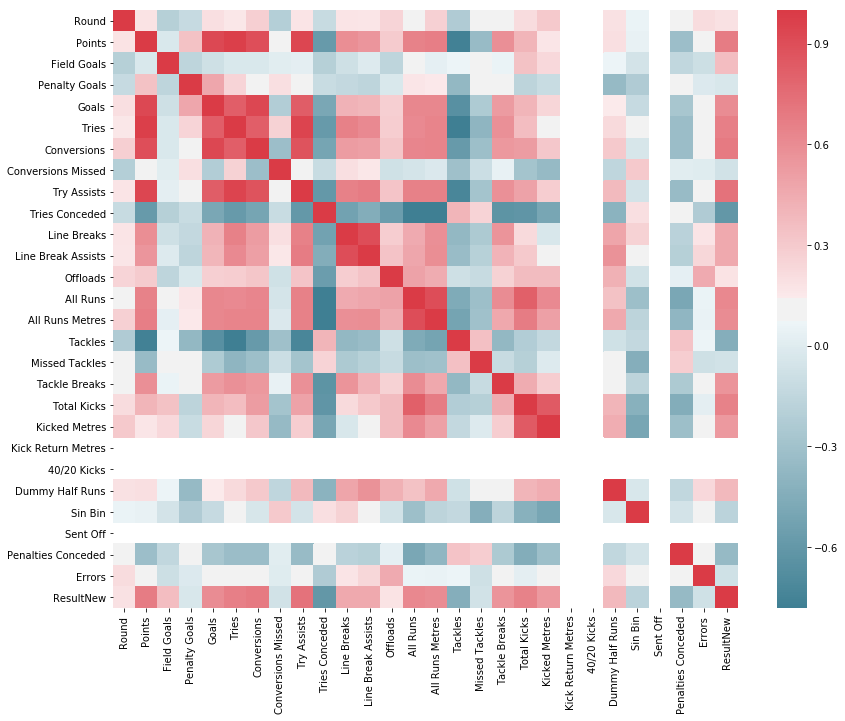

In [69]:
plt.figure(figsize=(14,11))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(claire.corr(), cmap=colormap)

In [71]:
corrRaw = claire.corr()
corrRaw = abs(corrRaw['ResultNew'])
corrRaw.sort_values(ascending=False)

ResultNew             1.000000
Try Assists           0.725589
Conversions           0.692046
Points                0.675800
Tries                 0.662235
Total Kicks           0.650351
All Runs              0.622320
Tries Conceded        0.607240
All Runs Metres       0.602422
Goals                 0.602191
Tackle Breaks         0.566728
Kicked Metres         0.537698
Line Breaks           0.460682
Line Break Assists    0.457433
Tackles               0.435778
Dummy Half Runs       0.386150
Field Goals           0.361158
Penalties Conceded    0.353848
Round                 0.188533
Offloads              0.185355
Sin Bin               0.174078
Errors                0.075637
Conversions Missed    0.070770
Missed Tackles        0.069214
Penalty Goals         0.034080
Kick Return Metres         NaN
40/20 Kicks                NaN
Sent Off                   NaN
Name: ResultNew, dtype: float64

In [72]:
round26 = claire[(claire['Round'] == 26)]

In [73]:
round26.head()

,Round,Home/ Away,Opponent,Result,Points,Field Goals,Penalty Goals,Goals,Tries,Conversions,...,Total Kicks,Kicked Metres,Kick Return Metres,40/20 Kicks,Dummy Half Runs,Sin Bin,Sent Off,Penalties Conceded,Errors,ResultNew
23,26,A,Broncos,L,14,0,1,3,2,2,...,22,636,0,0,5,0,0,6,13,0.0


In [74]:
claire

,Round,Home/ Away,Opponent,Result,Points,Field Goals,Penalty Goals,Goals,Tries,Conversions,...,Total Kicks,Kicked Metres,Kick Return Metres,40/20 Kicks,Dummy Half Runs,Sin Bin,Sent Off,Penalties Conceded,Errors,ResultNew
0,1,H,Rabbitohs,L,10,0,0,1,2,1,...,16,321,0,0,2,0,0,6,6,0.0
1,2,A,Raiders,L,20,0,2,2,4,0,...,14,273,0,0,4,0,0,8,8,0.0
2,3,A,Cowboys,L,0,0,0,0,0,0,...,16,372,0,0,6,0,0,6,12,0.0
3,4,H,Sea Eagles,L,20,0,1,2,4,1,...,23,492,0,0,5,0,0,4,12,0.0
4,5,H,Warriors,L,28,0,2,6,4,4,...,14,313,0,0,4,0,0,7,12,0.0
5,6,A,Rabitohs,W,17,1,0,2,3,2,...,26,566,0,0,7,0,0,5,10,1.0
6,7,H,Panthers,L,16,0,0,2,3,2,...,19,385,0,0,11,0,0,6,13,0.0
7,8,A,Dragons,L,18,0,0,3,3,3,...,24,486,0,0,7,0,0,8,14,0.0
8,9,H,Knights,W,38,0,1,7,6,6,...,25,490,0,0,4,0,0,5,9,1.0
9,10,A,Titans,L,6,0,1,1,1,0,...,15,449,0,0,3,0,0,8,13,0.0


In [75]:
otherrounds = claire[(claire['Round'] != 26)]

In [76]:
np.random.seed(7654567)

In [77]:
stats.ttest_1samp(otherrounds['Tries'], round26['Tries'].iloc[0])

Ttest_1sampResult(statistic=3.4285222662415884, pvalue=0.002401982284399062)

In [79]:
# Factors most correlated with a win
corrRaw = claire.corr()
corrRaw = abs(corrRaw['ResultNew'])
corrRaw.sort_values(ascending=False)

ResultNew             1.000000
Try Assists           0.725589
Conversions           0.692046
Points                0.675800
Tries                 0.662235
Total Kicks           0.650351
All Runs              0.622320
Tries Conceded        0.607240
All Runs Metres       0.602422
Goals                 0.602191
Tackle Breaks         0.566728
Kicked Metres         0.537698
Line Breaks           0.460682
Line Break Assists    0.457433
Tackles               0.435778
Dummy Half Runs       0.386150
Field Goals           0.361158
Penalties Conceded    0.353848
Round                 0.188533
Offloads              0.185355
Sin Bin               0.174078
Errors                0.075637
Conversions Missed    0.070770
Missed Tackles        0.069214
Penalty Goals         0.034080
Kick Return Metres         NaN
40/20 Kicks                NaN
Sent Off                   NaN
Name: ResultNew, dtype: float64

### The top 12 performance indicators most correlated with the match result are:

1. Try assists
2. Conversions
3. Points
4. Tries
5. Total Kicks
6. All Runs
7. Tries conceded
8. All Runs Metres
9. Goals
10. Tackle Breaks
11. Kicked Metres
12. Line Breaks

In [94]:
onesample_results1 = stats.ttest_1samp(otherrounds['Try Assists'], round26['Try Assists'].iloc[0])
onesample_results2 = stats.ttest_1samp(otherrounds['Conversions'], round26['Conversions'].iloc[0])
onesample_results3a = stats.ttest_1samp(otherrounds['Points'], round26['Points'].iloc[0])
onesample_results3 = stats.ttest_1samp(otherrounds['Tries'], round26['Tries'].iloc[0])
onesample_results4 = stats.ttest_1samp(otherrounds['Total Kicks'], round26['Total Kicks'].iloc[0])
onesample_results5 = stats.ttest_1samp(otherrounds['All Runs'], round26['All Runs'].iloc[0])
onesample_results6 = stats.ttest_1samp(otherrounds['Tries Conceded'], round26['Tries Conceded'].iloc[0])
onesample_results8 = stats.ttest_1samp(otherrounds['All Runs Metres'], round26['All Runs Metres'].iloc[0])
onesample_results9 = stats.ttest_1samp(otherrounds['Goals'], round26['Goals'].iloc[0])
onesample_results10 = stats.ttest_1samp(otherrounds['Tackle Breaks'], round26['Tackle Breaks'].iloc[0])
onesample_results11 = stats.ttest_1samp(otherrounds['Kicked Metres'], round26['Kicked Metres'].iloc[0])
onesample_results12 = stats.ttest_1samp(otherrounds['Line Breaks'], round26['Line Breaks'].iloc[0])


matrix_onesample = [
    ['', 'Mean All Other Rounds', 'Mean Round 26', 'Test Statistic', 'p-value'],
    ['Try Assists', otherrounds['Try Assists'].mean(), round26['Try Assists'].mean(), onesample_results1[0], onesample_results1[1]],
    ['Conversions', otherrounds['Conversions'].mean(), round26['Conversions'].mean(), onesample_results2[0], onesample_results2[1]],
    ['Points', otherrounds['Points'].mean(), round26['Points'].mean(), onesample_results3a[0], onesample_results3a[1]],
    ['Tries', otherrounds['Tries'].mean(), round26['Tries'].mean(), onesample_results3[0], onesample_results3[1]],
    ['Total Kicks', otherrounds['Total Kicks'].mean(), round26['Total Kicks'].mean(), onesample_results4[0], onesample_results4[1]],
    ['All Runs', otherrounds['All Runs'].mean(), round26['All Runs'].mean(),onesample_results5[0], onesample_results5[1]],
    ['Tries Conceded', otherrounds['Tries Conceded'].mean(), round26['Tries Conceded'].mean(), onesample_results6[0], onesample_results6[1]],
    ['All Runs Metres', otherrounds['All Runs Metres'].mean(), round26['All Runs Metres'].mean(), onesample_results8[0], onesample_results8[1]],
    ['Goals', otherrounds['Goals'].mean(), round26['Goals'].mean(), onesample_results9[0], onesample_results9[1]],
    ['Tackle Breaks', otherrounds['Tackle Breaks'].mean(), round26['Tackle Breaks'].mean(), onesample_results10[0], onesample_results10[1]],
    ['Kicked Metres', otherrounds['Kicked Metres'].mean(), round26['Kicked Metres'].mean(), onesample_results11[0], onesample_results11[1]],
    ['Line Breaks', otherrounds['Line Breaks'].mean(), round26['Line Breaks'].mean(), onesample_results12[0], onesample_results12[1]]]

results = pd.DataFrame(matrix_onesample)
results.columns = results.iloc[0]
results = results.reindex(results.index.drop(0))
results

,,Mean All Other Rounds,Mean Round 26,Test Statistic,p-value
1,Try Assists,2.86957,2,2.32781,0.0295164
2,Conversions,2.26087,2,0.689485,0.497727
3,Points,18.6522,14,2.08496,0.0488889
4,Tries,3.26087,2,3.42852,0.00240198
5,Total Kicks,19.4348,22,-3.00125,0.00657548
6,All Runs,168.261,171,-0.632011,0.533893
7,Tries Conceded,4.08696,4,0.186649,0.853647
8,All Runs Metres,1522.26,1443,1.53334,0.139448
9,Goals,2.78261,3,-0.510069,0.615083
10,Tackle Breaks,31.4348,39,-4.11569,0.000454834
